In [ ]:
# --- Step 1: Setup and Installation ---
print("--- Installing necessary libraries ---")
!pip install pandas numpy pyarrow tqdm --quiet
print("--- Libraries installed successfully. ---")

import pandas as pd
import os
import glob
from tqdm.notebook import tqdm
from collections import Counter
import pyarrow.parquet as pq

# --- Step 2: Mount Google Drive and Define Paths ---
print("\n--- Mounting Google Drive ---")
try:
    from google.colab import drive
    drive.mount('/content/drive')
    # IMPORTANT: This path should point to the directory containing your Parquet files.
    # Adjust if you are using 'featured_batches' or 'preprocessed_batches'.
    DATA_DIR_PATH = '/content/drive/MyDrive/VitalDB_Drift_Focused_Dataset/preprocessed_batches'
    print(f"--- Target directory for analysis: {DATA_DIR_PATH} ---")
except Exception as e:
    print(f"Could not mount Google Drive. Error: {e}")
    DATA_DIR_PATH = '.' # Fallback for local execution

# --- Step 3: Discover and Count Batch Files ---
print("\n--- Discovering data files... ---")
files_to_analyze = sorted(glob.glob(os.path.join(DATA_DIR_PATH, '*.parquet')))
if not files_to_analyze:
    raise FileNotFoundError(f"CRITICAL ERROR: No .parquet files found in '{DATA_DIR_PATH}'. Please check the path.")
total_files = len(files_to_analyze)
print(f"--- Found {total_files} data files to analyze. ---")


# --- Step 4: Perform a Comprehensive Feature Census ---
print("\n--- Starting Feature Census... ---")
# We will use a Counter to store the name of every column and count its appearances.
feature_counts = Counter()

for file_path in tqdm(files_to_analyze, desc="Scanning file schemas"):
    try:
        # This is the most efficient way to get column names without loading data.
        schema = pq.read_schema(file_path)
        # Update our counter with the list of columns found in this file.
        feature_counts.update(schema.names)
    except Exception as e:
        print(f"\nCould not process file: {file_path}. Error: {e}")

print("--- Feature Census complete. ---")


# --- Step 5: Generate and Display the Final Report ---
print("\n\n--- FEATURE AVAILABILITY REPORT ---")
print("=====================================")
print(f"A total of {len(feature_counts)} unique features were found across {total_files} files.\n")

# Convert the counter to a pandas DataFrame for easy sorting and display.
feature_report = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['File_Count'])
feature_report['Availability (%)'] = (feature_report['File_Count'] / total_files) * 100

# Sort the report to show the most common features first.
feature_report.sort_values(by='File_Count', ascending=False, inplace=True)

# Set display options to ensure we see the entire list.
pd.set_option('display.max_rows', len(feature_report) + 1)

print(feature_report)

print("\n--- CENSUS COMPLETE ---")

--- Installing necessary libraries ---
--- Libraries installed successfully. ---

--- Mounting Google Drive ---
Mounted at /content/drive
--- Target directory for analysis: /content/drive/MyDrive/VitalDB_Drift_Focused_Dataset/preprocessed_batches ---

--- Discovering data files... ---
--- Found 64 data files to analyze. ---

--- Starting Feature Census... ---


Scanning file schemas:   0%|          | 0/64 [00:00<?, ?it/s]

--- Feature Census complete. ---


--- FEATURE AVAILABILITY REPORT ---
A total of 44 unique features were found across 64 files.

                                   File_Count  Availability (%)
BIS/BIS                                    64          100.0000
BIS/EMG                                    64          100.0000
BIS/SEF                                    64          100.0000
BIS/SR                                     64          100.0000
Orchestra/PPF20_VOL                        64          100.0000
Solar8000/HR                               64          100.0000
Solar8000/ART_MBP                          64          100.0000
Solar8000/RR_CO2                           64          100.0000
BIS/BIS_lag_60s                            64          100.0000
BIS/BIS_lag_10s                            64          100.0000
BIS/BIS_lag_600s                           64          100.0000
BIS/BIS_lag_300s                           64          100.0000
Tension_Index                         

--- Installing necessary libraries ---
--- Libraries installed successfully. ---

--- Mounting Google Drive ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Target directory for analysis: /content/drive/MyDrive/VitalDB_Drift_Focused_Dataset/preprocessed_batches ---

--- Selecting a single patient... ---
--- Selected Patient ID for visualization: 4755.0 ---
--- Loading all data for Patient 4755.0... ---


Scanning files:   0%|          | 0/64 [00:00<?, ?it/s]

--- Successfully loaded 4799 time points for the patient. ---

--- Generating patient timeline visualization... ---


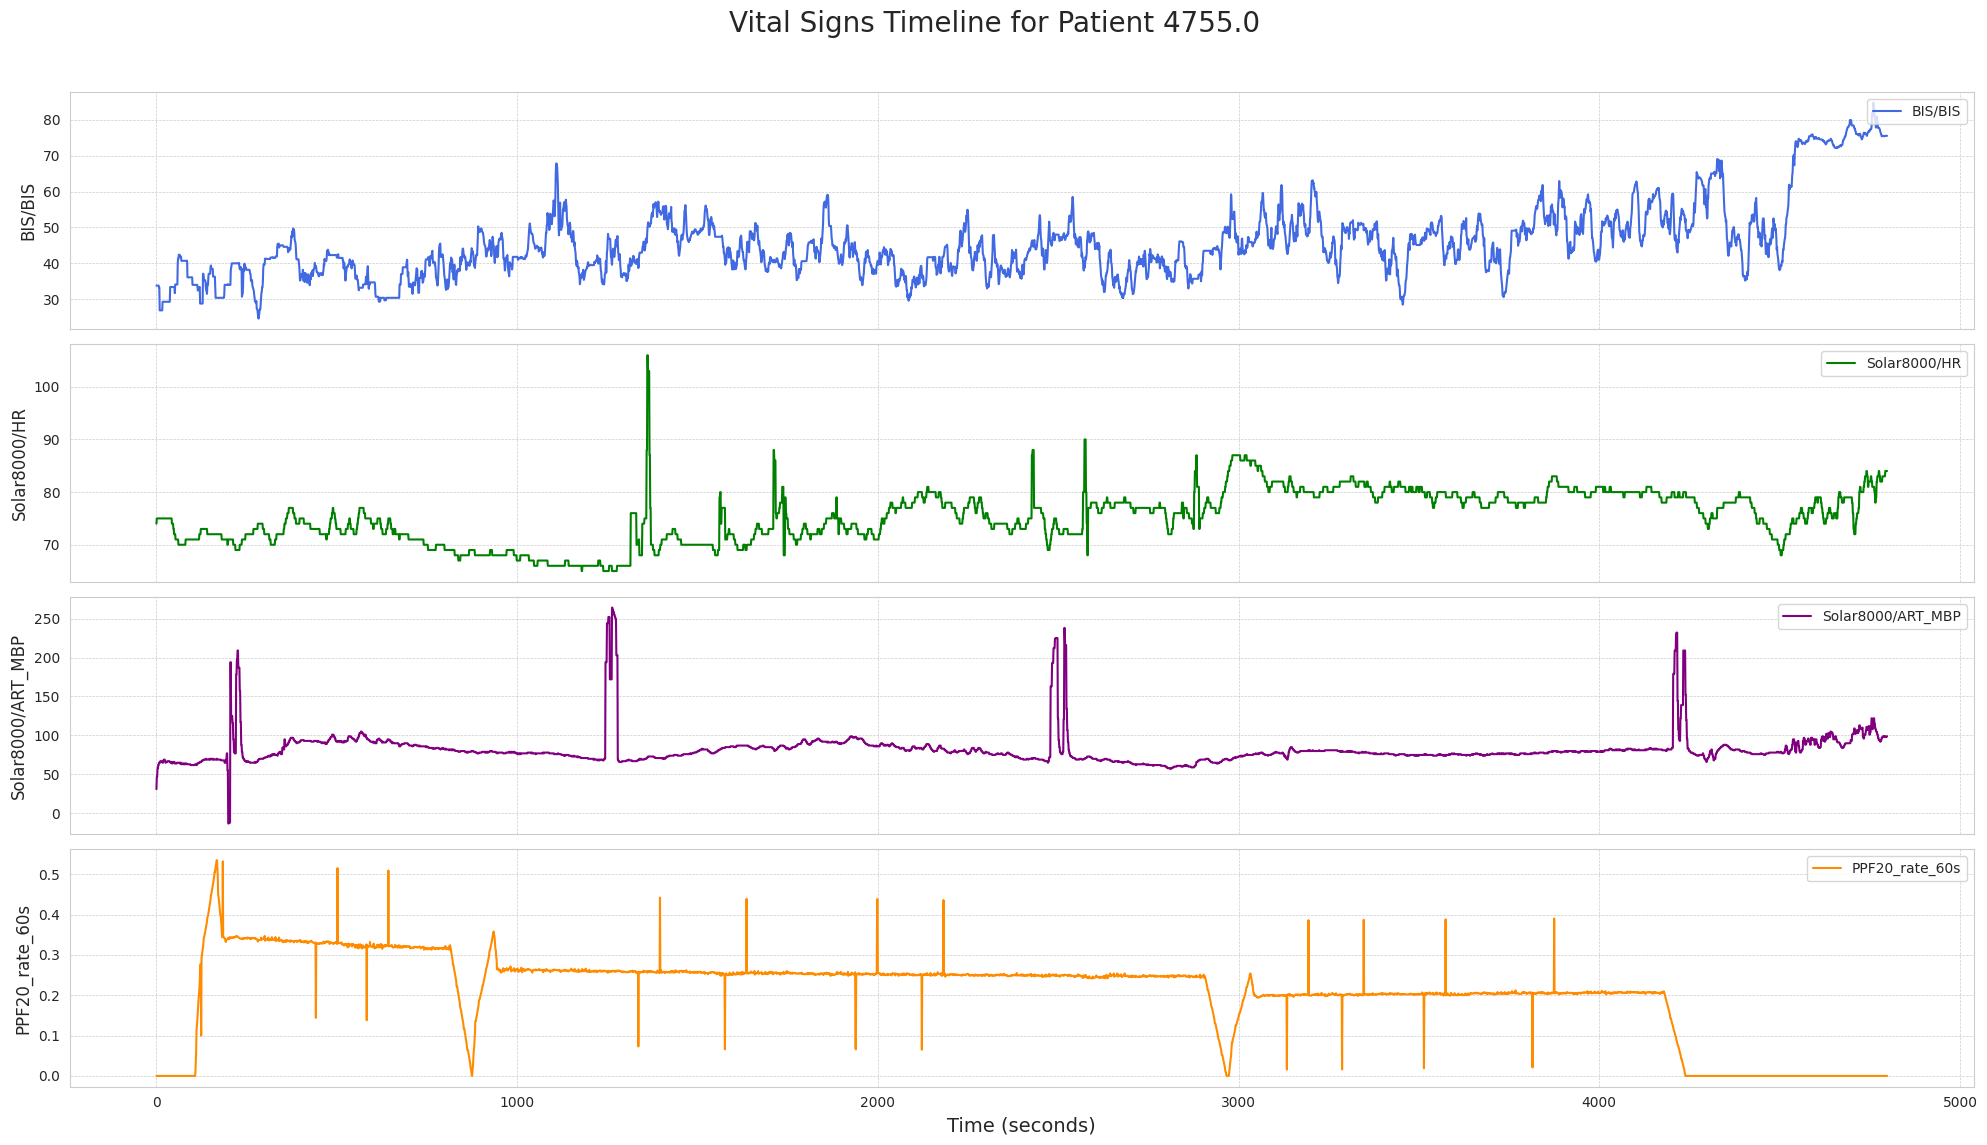

In [ ]:
# --- Step 1: Setup and Installation ---
print("--- Installing necessary libraries ---")
!pip install pandas numpy pyarrow matplotlib seaborn --quiet
print("--- Libraries installed successfully. ---")

import pandas as pd
import numpy as np
import os
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Mount Google Drive and Define Paths ---
print("\n--- Mounting Google Drive ---")
try:
    from google.colab import drive
    drive.mount('/content/drive')
    # We will use the preprocessed batches as they contain the most raw form of the data
    DATA_DIR_PATH = '/content/drive/MyDrive/VitalDB_Drift_Focused_Dataset/preprocessed_batches'
    print(f"--- Target directory for analysis: {DATA_DIR_PATH} ---")
except Exception as e:
    print(f"Could not mount Google Drive. Error: {e}")
    DATA_DIR_PATH = '.'

# --- Step 3: Select a Single Patient to Analyze ---
print("\n--- Selecting a single patient... ---")
files_to_analyze = sorted(glob.glob(os.path.join(DATA_DIR_PATH, '*.parquet')))
if not files_to_analyze:
    raise FileNotFoundError(f"CRITICAL ERROR: No .parquet files found in '{DATA_DIR_PATH}'.")

# Get all unique patient IDs to choose from
all_pids = pd.concat([pd.read_parquet(f, columns=['patient_id']) for f in files_to_analyze])['patient_id'].unique()

# You can change this ID to visualize a different patient
TARGET_PATIENT_ID = all_pids[len(all_pids) // 2] # Let's pick a patient from the middle of the list
print(f"--- Selected Patient ID for visualization: {TARGET_PATIENT_ID} ---")

# --- Step 4: Load All Data for the Selected Patient ---
print(f"--- Loading all data for Patient {TARGET_PATIENT_ID}... ---")
patient_df_list = []
for file_path in tqdm(files_to_analyze, desc="Scanning files"):
    df_chunk = pd.read_parquet(file_path).reset_index()
    patient_chunk = df_chunk[df_chunk['patient_id'] == TARGET_PATIENT_ID]
    if not patient_chunk.empty:
        patient_df_list.append(patient_chunk)

if not patient_df_list:
    raise ValueError(f"Could not find any data for Patient {TARGET_PATIENT_ID}")

patient_df = pd.concat(patient_df_list).sort_values('Time').reset_index(drop=True)
print(f"--- Successfully loaded {len(patient_df)} time points for the patient. ---")


# --- Step 5: Prepare Data for Plotting ---
# Calculate the rate of Propofol infusion, as the raw cumulative volume isn't very informative.
# We'll calculate the amount infused over a rolling 60-second window.
patient_df['PPF20_rate_60s'] = patient_df['Orchestra/PPF20_VOL'].diff().rolling(window=60).sum().fillna(0)

# Define the key signals we want to visualize
signals_to_plot = {
    'BIS/BIS': 'royalblue',
    'Solar8000/HR': 'green',
    'Solar8000/ART_MBP': 'purple',
    'PPF20_rate_60s': 'darkorange'
}

# --- Step 6: Generate the Visualization ---
print("\n--- Generating patient timeline visualization... ---")

# Create subplots that share the same time axis
fig, axes = plt.subplots(len(signals_to_plot), 1, figsize=(20, 12), sharex=True)
fig.suptitle(f'Vital Signs Timeline for Patient {TARGET_PATIENT_ID}', fontsize=20)
sns.set_style("whitegrid")

# Create a time axis from the dataframe's index
time_axis = patient_df.index

# Plot each signal on its own subplot for clarity
for i, (signal_name, color) in enumerate(signals_to_plot.items()):
    ax = axes[i]
    ax.plot(time_axis, patient_df[signal_name], color=color, label=signal_name)
    ax.set_ylabel(signal_name, fontsize=12)
    ax.legend(loc='upper right')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

axes[-1].set_xlabel('Time (seconds)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

--- Installing necessary libraries ---
--- Libraries installed successfully. ---

--- Mounting Google Drive ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Target directory for analysis: /content/drive/MyDrive/VitalDB_Drift_Focused_Dataset/preprocessed_batches ---

--- Identifying all available drug-related features... ---


Scanning for drug features:   0%|          | 0/64 [00:00<?, ?it/s]

--- Found 2 unique drug-related features across all files: ---
  - Orchestra/PPF20_VOL
  - Orchestra/RFTN50_RATE

--- Searching for a patient with the most drug data available... ---


Finding best patient:   0%|          | 0/100 [00:00<?, ?it/s]

--- Selected Patient 4207.0 with 2 active drug features. ---
--- Loading all data for Patient 4207.0... ---


Loading patient data:   0%|          | 0/64 [00:00<?, ?it/s]

--- Successfully loaded 16212 time points. ---

--- Generating Drug-Centric Timeline Visualization ---


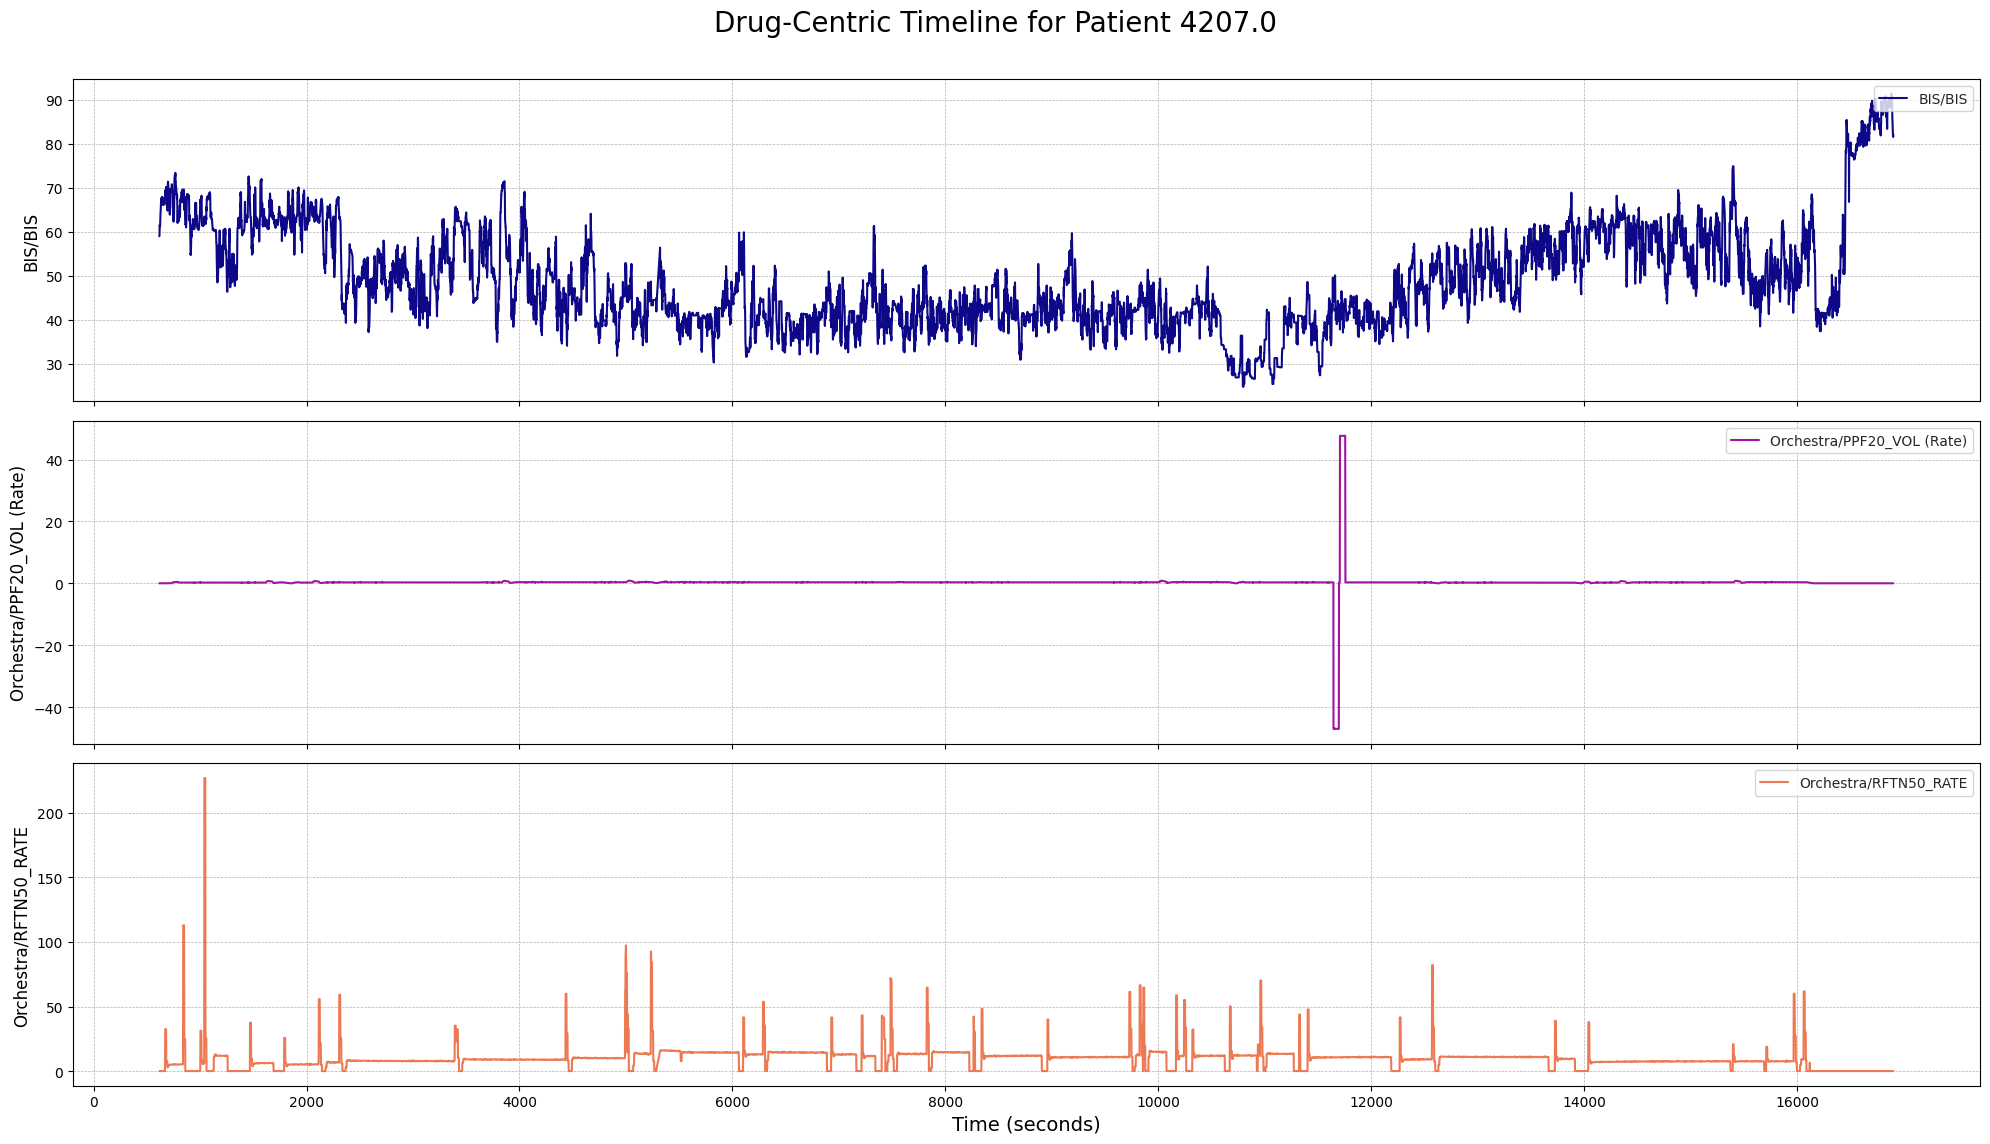

In [ ]:
# --- Step 1: Setup and Installation ---
print("--- Installing necessary libraries ---")
!pip install pandas numpy pyarrow matplotlib seaborn tqdm --quiet
print("--- Libraries installed successfully. ---")

import pandas as pd
import numpy as np
import os
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

# --- Step 2: Mount Google Drive and Define Paths ---
print("\n--- Mounting Google Drive ---")
try:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_DIR_PATH = '/content/drive/MyDrive/VitalDB_Drift_Focused_Dataset/preprocessed_batches'
    print(f"--- Target directory for analysis: {DATA_DIR_PATH} ---")
except Exception as e:
    print(f"Could not mount Google Drive. Error: {e}")
    DATA_DIR_PATH = '.'

# --- Step 3: Perform Drug Feature Reconnaissance ---
print("\n--- Identifying all available drug-related features... ---")
feature_files = sorted(glob.glob(os.path.join(DATA_DIR_PATH, '*.parquet')))
if not feature_files:
    raise FileNotFoundError(f"CRITICAL ERROR: No .parquet files found in '{DATA_DIR_PATH}'.")

drug_features = set()
for file_path in tqdm(feature_files, desc="Scanning for drug features"):
    schema = pq.read_schema(file_path)
    for col_name in schema.names:
        if col_name.startswith('Orchestra/'):
            drug_features.add(col_name)

drug_features = sorted(list(drug_features))
print(f"--- Found {len(drug_features)} unique drug-related features across all files: ---")
for feature in drug_features:
    print(f"  - {feature}")


# --- Step 4: Find a Suitable Patient with a Rich Drug Profile ---
print("\n--- Searching for a patient with the most drug data available... ---")
all_pids = pd.concat([pd.read_parquet(f, columns=['patient_id']) for f in feature_files])['patient_id'].unique()

best_patient_id = None
max_drug_features_found = -1

# We'll check a sample of patients to find a good candidate
for patient_id in tqdm(np.random.choice(all_pids, 100, replace=False), desc="Finding best patient"):
    patient_df_list = []
    for file_path in feature_files:
        df_chunk = pd.read_parquet(file_path).reset_index()
        if 'patient_id' in df_chunk.columns:
            patient_chunk = df_chunk[df_chunk['patient_id'] == patient_id]
            if not patient_chunk.empty:
                patient_df_list.append(patient_chunk)

    if not patient_df_list: continue

    patient_df = pd.concat(patient_df_list)

    # Count how many of the identified drug features have non-zero data for this patient
    found_count = 0
    for feature in drug_features:
        if feature in patient_df.columns and patient_df[feature].nunique() > 1:
            found_count += 1

    if found_count > max_drug_features_found:
        max_drug_features_found = found_count
        best_patient_id = patient_id

if best_patient_id is None:
    raise ValueError("Could not find a suitable patient with drug data.")

print(f"--- Selected Patient {best_patient_id} with {max_drug_features_found} active drug features. ---")


# --- Step 5: Load and Visualize Data for the Selected Patient ---
print(f"--- Loading all data for Patient {best_patient_id}... ---")
patient_df_list = []
for file_path in tqdm(feature_files, desc="Loading patient data"):
    df_chunk = pd.read_parquet(file_path).reset_index()
    if 'patient_id' in df_chunk.columns:
        patient_chunk = df_chunk[df_chunk['patient_id'] == best_patient_id]
        if not patient_chunk.empty:
            patient_df_list.append(patient_chunk)

patient_df = pd.concat(patient_df_list).sort_values('Time').reset_index(drop=True)
print(f"--- Successfully loaded {len(patient_df)} time points. ---")

# --- Generate the Visualization ---
print("\n--- Generating Drug-Centric Timeline Visualization ---")

# Identify which of the drug features are actually present for this patient
patient_drug_features = [f for f in drug_features if f in patient_df.columns and patient_df[f].nunique() > 1]
features_to_plot = ['BIS/BIS'] + patient_drug_features

fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(20, 4 * len(features_to_plot)), sharex=True)
fig.suptitle(f'Drug-Centric Timeline for Patient {best_patient_id}', fontsize=20)
sns.set_style("whitegrid")

time_axis = patient_df['Time']

for i, signal_name in enumerate(features_to_plot):
    ax = axes[i]

    # If the feature is a cumulative volume, plot its rate of change instead
    if signal_name.endswith('_VOL'):
        rate_signal = patient_df[signal_name].diff().rolling(window=60, min_periods=1).sum().fillna(0)
        plot_label = f"{signal_name} (Rate)"
        ax.plot(time_axis, rate_signal, label=plot_label, color=plt.cm.plasma(i / len(features_to_plot)))
    else:
        plot_label = signal_name
        ax.plot(time_axis, patient_df[signal_name], label=plot_label, color=plt.cm.plasma(i / len(features_to_plot)))

    ax.set_ylabel(plot_label, fontsize=12)
    ax.legend(loc='upper right')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

axes[-1].set_xlabel('Time (seconds)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()9